In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
import plotly.express as px
import numpy as np

ModuleNotFoundError: No module named 'sklearn'

In [2]:
import dagshub
import mlflow
dagshub.init(repo_owner='pankaj-2708', repo_name='You-tube-Comment-analysis', mlflow=True)

Accessing as pankaj-2708

Initialized MLflow to track repo "pankaj-2708/You-tube-Comment-analysis"

Repository pankaj-2708/You-tube-Comment-analysis initialized!

In [12]:
mlflow.set_experiment("jupyter-lab")

2025/09/30 18:02:19 INFO mlflow.tracking.fluent: Experiment with name 'jupyter-lab' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/c4c3e8dd03694821a998d8d0b10c59d4', creation_time=1759235536530, experiment_id='1', last_update_time=1759235536530, lifecycle_stage='active', name='jupyter-lab', tags={}>

In [3]:
train=pd.read_csv("../data/train_test_split/train.csv")
test=pd.read_csv("../data/train_test_split/test.csv")
X=train.drop(columns=['lb__Sentiment'])
y=train['lb__Sentiment']
test_X=test.drop(columns=['lb__Sentiment'])
test_y=test['lb__Sentiment']

In [30]:
X.shape

(14298, 2008)

In [31]:
from sklearn.naive_bayes import BernoulliNB
des=BernoulliNB()
des.fit(X,y)
y_pred=des.predict(test_X)
accuracy_score(y_pred,test_y)

0.7205594405594405

In [15]:
des=DecisionTreeClassifier(max_depth=6)
des.fit(X,y)
y_pred=des.predict(test_X)
accuracy_score(y_pred,test_y)

0.6643356643356644

In [5]:
# from dtreeviz.trees import *
# from IPython.display import Image, display_svg, SVG
# import graphviz.backend as be

# viz = dtreeviz(clas, 
#                X,
#                y,
#                feature_names=X.feature_names, 
#                class_names=['negative', 'neutral', 'positive'])
# viz

In [6]:
import plotly.io as pio
pio.renderers.default = "notebook" 

In [11]:
feature_imp=pd.DataFrame(np.hstack((des.feature_importances_.reshape(len(des.feature_names_in_),1),des.feature_names_in_.reshape(len(des.feature_names_in_),1))),columns=['importance','name'])
feature_imp_sorted=feature_imp.sort_values(by="importance",ascending=False)
feature_imp_sorted=feature_imp_sorted.head(10)
px.bar(x=feature_imp_sorted["importance"]*100,y=feature_imp_sorted['name'],orientation='h')

In [46]:
feature_imp_sorted

,importance,name
5,0.547121,std__PositiveWordCount
0,0.131541,std__comment_len
4,0.097684,std__stopword_count
255,0.074302,remainder__like
6,0.050424,std__NegativeWordCount
187,0.041458,remainder__good
33,0.019768,remainder__appreci
441,0.012115,remainder__thank
305,0.004796,remainder__never
129,0.004272,remainder__enjoy


In [17]:
with mlflow.start_run():
    mlflow.log_param("model", "descison tree")
    mlflow.log_param("max_depth", "6")
    model_ = DecisionTreeClassifier(max_depth=6)

    model_.fit(X, y)
    pred_y = model_.predict(test_X)

    mlflow.log_metric("accuracy", accuracy_score(test_y, pred_y))

🏃 View run angry-lamb-868 at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1/runs/554dc7a53344407aadc60f19fd4a8610
🧪 View experiment at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1


In [32]:
# PCA
from sklearn.decomposition import PCA
pc=PCA(n_components=10)
pc.fit(X)
pc.explained_variance_ratio_.sum()
X_pc=pc.transform(X)
X_pc_test=pc.transform(test_X)

In [33]:
des=DecisionTreeClassifier(max_depth=6)
des.fit(X_pc,y)
y_pred=des.predict(X_pc_test)
accuracy_score(y_pred,test_y)

0.6763636363636364

In [34]:
with mlflow.start_run():
    mlflow.log_param("model", "descison tree")
    mlflow.log_param("max_depth", "6")
    mlflow.log_param("pca", "True")
    model_ = DecisionTreeClassifier(max_depth=6)

    model_.fit(X_pc, y)
    pred_y = model_.predict(X_pc_test)

    mlflow.log_metric("accuracy", accuracy_score(test_y, pred_y))

🏃 View run abundant-stork-340 at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1/runs/8e6f8b3afdb84c359f437f497fe76002
🧪 View experiment at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1


In [45]:
des=RandomForestClassifier(max_depth=6,n_estimators=50,random_state=42,max_features=0.7,max_samples=0.7)
des.fit(X,y)
y_pred=des.predict(test_X)
accuracy_score(y_pred,test_y)

0.6732867132867133

In [46]:
feature_imp=pd.DataFrame(np.hstack((des.feature_importances_.reshape(len(des.feature_names_in_),1),des.feature_names_in_.reshape(len(des.feature_names_in_),1))),columns=['importance','name'])
feature_imp_sorted=feature_imp.sort_values(by="importance",ascending=False)
feature_imp_sorted=feature_imp_sorted.head(10)
px.bar(x=feature_imp_sorted["importance"]*100,y=feature_imp_sorted['name'],orientation='h')

In [52]:
with mlflow.start_run():
    mlflow.log_param("model", "random forest")
    model_ = RandomForestClassifier(max_depth=6,n_estimators=50,random_state=42,max_features=0.7,max_samples=0.7)
    param=model_.get_params()
    model_.fit(X, y)
    for i in range(len(param)):
        mlflow.log_param(list(param.keys())[i],list(param.values())[i])

    pred_y = model_.predict(test_X)

    mlflow.log_metric("accuracy", accuracy_score(test_y, pred_y))

🏃 View run righteous-lamb-44 at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1/runs/867f270eea0741729bd7127c307f054b
🧪 View experiment at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1


In [54]:
des=RandomForestClassifier(max_depth=6,n_estimators=50,random_state=42,max_features=0.7,max_samples=0.7)
des.fit(X_pc,y)
y_pred=des.predict(X_pc_test)
y_pred_train=des.predict(X_pc)
accuracy_score(y_pred,test_y),accuracy_score(y_pred_train,y)

(0.6833566433566434, 0.69499230661631)

In [64]:
from imblearn.ensemble import BalancedRandomForestClassifier
des=BalancedRandomForestClassifier(max_depth=8,n_estimators=40)
des.fit(X,y)
y_pred=des.predict(test_X)
y_pred_train=des.predict(X)
accuracy_score(y_pred,test_y),accuracy_score(y_pred_train,y)

(0.6173426573426574, 0.6349839138341027)

In [74]:
with mlflow.start_run():
    mlflow.log_param("model", "balanced random forest")
    model_ = BalancedRandomForestClassifier(max_depth=8,n_estimators=40)
    param=model_.get_params()
    model_.fit(X, y)
    for i in range(len(param)):
        mlflow.log_param(list(param.keys())[i],list(param.values())[i])

    pred_y = model_.predict(test_X)

    mlflow.log_metric("accuracy", accuracy_score(test_y, pred_y))

🏃 View run vaunted-elk-244 at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1/runs/609cfedf496945cf990c28c4ca921250
🧪 View experiment at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1


In [67]:
des=GradientBoostingClassifier(max_depth=5,n_estimators=50)
des.fit(X,y)
y_pred=des.predict(test_X)
y_pred_train=des.predict(X)
accuracy_score(y_pred,test_y),accuracy_score(y_pred_train,y)

(0.7026573426573427, 0.7485662330395859)

In [68]:
feature_imp=pd.DataFrame(np.hstack((des.feature_importances_.reshape(len(des.feature_names_in_),1),des.feature_names_in_.reshape(len(des.feature_names_in_),1))),columns=['importance','name'])
feature_imp_sorted=feature_imp.sort_values(by="importance",ascending=False)
feature_imp_sorted=feature_imp_sorted.head(10)
px.bar(x=feature_imp_sorted["importance"]*100,y=feature_imp_sorted['name'],orientation='h')

In [70]:
with mlflow.start_run():
    mlflow.log_param("model", "gradient boosting")
    model_ = GradientBoostingClassifier(max_depth=5,n_estimators=50)
    param=model_.get_params()
    model_.fit(X, y)
    for i in range(len(param)):
        mlflow.log_param(list(param.keys())[i],list(param.values())[i])

    pred_y = model_.predict(test_X)

    mlflow.log_metric("accuracy", accuracy_score(test_y, pred_y))

🏃 View run welcoming-mink-569 at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1/runs/be089d1503644232b7d72a9170efed6d
🧪 View experiment at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1


In [69]:
des=GradientBoostingClassifier(max_depth=5,n_estimators=50)
des.fit(X_pc,y)
y_pred=des.predict(X_pc_test)
y_pred_train=des.predict(X_pc)
accuracy_score(y_pred,test_y),accuracy_score(y_pred_train,y)

(0.6847552447552447, 0.7393341726115541)

In [71]:
with mlflow.start_run():
    mlflow.log_param("model", "gradient boosting")
    mlflow.log_param("pca", "True")
    model_ = GradientBoostingClassifier(max_depth=5,n_estimators=50)
    param=model_.get_params()
    model_.fit(X_pc, y)
    for i in range(len(param)):
        mlflow.log_param(list(param.keys())[i],list(param.values())[i])

    pred_y = model_.predict(X_pc_test)

    mlflow.log_metric("accuracy", accuracy_score(test_y, pred_y))

🏃 View run legendary-lark-276 at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1/runs/f2692d9f938c415eb14be7a855e694f5
🧪 View experiment at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1


In [84]:
from xgboost import XGBClassifier
des=XGBClassifier(max_depth=5,n_estimators=40,subsample=0.7,colsample_bytree=0.7)
des.fit(X,y)
y_pred=des.predict(test_X)
y_pred_train=des.predict(X)
accuracy_score(y_pred,test_y),accuracy_score(y_pred_train,y)

(0.7197202797202797, 0.7652818576024619)

In [97]:
feature_imp=pd.DataFrame(np.hstack((np.array([[round(i[0],4)] for i in des.feature_importances_.reshape(len(des.feature_names_in_),1)]),des.feature_names_in_.reshape(len(des.feature_names_in_),1))),columns=['importance','name'])
feature_imp_sorted=feature_imp.sort_values(by="importance",ascending=False)
feature_imp_sorted=feature_imp_sorted.head(10)
px.bar(x=feature_imp_sorted["importance"]*100,y=feature_imp_sorted['name'],orientation='h')

In [85]:
with mlflow.start_run():
    mlflow.log_param("model", "xgboost")
    model_ =XGBClassifier(max_depth=5,n_estimators=40,subsample=0.7,colsample_bytree=0.7)
    param=model_.get_params()
    model_.fit(X, y)
    for i in range(len(param)):
        mlflow.log_param(list(param.keys())[i],list(param.values())[i])

    pred_y = model_.predict(test_X)
    pred_y_train = model_.predict(X)

    mlflow.log_metric("accuracy", accuracy_score(test_y, pred_y))
    mlflow.log_metric("accuracy_train", accuracy_score(y, pred_y_train))

🏃 View run respected-mouse-261 at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1/runs/cd91286c6f574f33a0bcacdf31da8ddf
🧪 View experiment at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1


In [100]:
with mlflow.start_run():
    mlflow.log_param("model", "xgboost")
    mlflow.log_param("pca", "True")
    model_ =XGBClassifier(max_depth=5,n_estimators=40,subsample=0.7,colsample_bytree=0.7)
    param=model_.get_params()
    model_.fit(X_pc, y)
    for i in range(len(param)):
        mlflow.log_param(list(param.keys())[i],list(param.values())[i])

    pred_y = model_.predict(X_pc_test)
    pred_y_train = model_.predict(X_pc)

    mlflow.log_metric("accuracy", accuracy_score(test_y, pred_y))
    mlflow.log_metric("accuracy_train", accuracy_score(y, pred_y_train))

🏃 View run agreeable-koi-547 at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1/runs/0d424797d4b34005ade74e1eccbce56f
🧪 View experiment at: https://dagshub.com/pankaj-2708/You-tube-Comment-analysis.mlflow/#/experiments/1


In [101]:
des=SVC()
des.fit(X,y)
y_pred=des.predict(test_X)
y_pred_train=des.predict(X)
accuracy_score(y_pred,test_y),accuracy_score(y_pred_train,y)

(0.7227972027972028, 0.8151489718841796)

In [ ]:
with mlflow.start_run():
    mlflow.log_param("model", "SVC")
    model_ =SVC()
    param=model_.get_params()
    model_.fit(X, y)
    for i in range(len(param)):
        mlflow.log_param(list(param.keys())[i],list(param.values())[i])

    pred_y = model_.predict(test_X)
    pred_y_train = model_.predict(X)

    mlflow.log_metric("accuracy", accuracy_score(test_y, pred_y))
    mlflow.log_metric("accuracy_train", accuracy_score(y, pred_y_train))

In [ ]:
des=Li()
des.fit(X,y)
y_pred=des.predict(test_X)
y_pred_train=des.predict(X)
accuracy_score(y_pred,test_y),accuracy_score(y_pred_train,y)

In [1]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization,Dropout

In [4]:
train.shape

(26527, 2009)

In [10]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(None,2008)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='Adam',metrics="accuracy",loss="sparse_categorical_crossentropy")

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, None, 128)         257152    
                                                                 
 dense_5 (Dense)             (None, None, 64)          8256      
                                                                 
 dense_6 (Dense)             (None, None, 32)          2080      
                                                                 
 dense_7 (Dense)             (None, None, 3)           99        
                                                                 
Total params: 267,587
Trainable params: 267,587
Non-trainable params: 0
_________________________________________________________________


In [12]:
history=model.fit(X,y,validation_split=0.2,epochs=10)

Epoch 1/10
664/664 [==============================] - 6s 7ms/step - loss: 0.6696 - accuracy: 0.7261 - val_loss: 0.4949 - val_accuracy: 0.8219
Epoch 2/10
664/664 [==============================] - 3s 5ms/step - loss: 0.3000 - accuracy: 0.8929 - val_loss: 0.3974 - val_accuracy: 0.8590
Epoch 3/10
664/664 [==============================] - 3s 5ms/step - loss: 0.1452 - accuracy: 0.9499 - val_loss: 0.4273 - val_accuracy: 0.8734
Epoch 4/10
664/664 [==============================] - 3s 5ms/step - loss: 0.0834 - accuracy: 0.9739 - val_loss: 0.5302 - val_accuracy: 0.8769
Epoch 5/10
664/664 [==============================] - 3s 5ms/step - loss: 0.0595 - accuracy: 0.9818 - val_loss: 0.5261 - val_accuracy: 0.8873
Epoch 6/10
664/664 [==============================] - 3s 5ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.6183 - val_accuracy: 0.8903
Epoch 7/10
664/664 [==============================] - 3s 5ms/step - loss: 0.0406 - accuracy: 0.9880 - val_loss: 0.7451 - val_accuracy: 0.8660
Epoch 

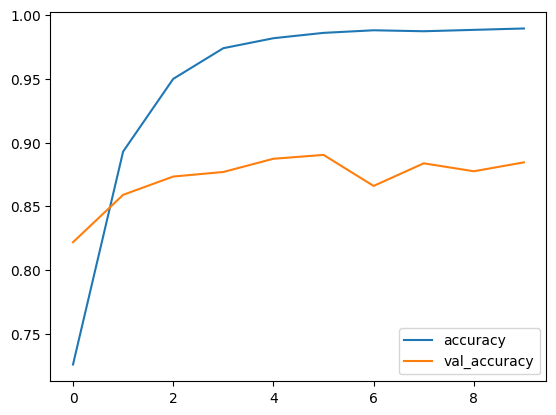

In [17]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history)['accuracy'].plot(kind="line")
pd.DataFrame(history.history)['val_accuracy'].plot(kind="line")
plt.legend()

In [ ]:
from sklearn.metrics import acc